In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nh = 0.1 #cm-3
x = 0.1

gamma = 6.625 * 1E8 #s-1
f = 0.4164
go = 2
Z = 2.00

me = 9.11 * 1E-28 #g
c = 3 * 1E10 #cm/s 
e = 4.8 * 1E-10 #cm3/2 g1/2 s-1

In [3]:
def calculate_intensity(v, vo, d):
    
    alpha = (e**2 * f * nh) / (4 * np.pi * me * c) * (1 - x) * go / Z * gamma / ((v-vo)**2 + (gamma / (4 * np.pi))**2)
    
    return np.exp(-alpha * d)

In [4]:
lamda_min_range = 11.5E-6 #500 Angstrom
lamda_max_range = 12.5E-6 #1800 Angstrom
N_DATAPOINTS = 100000
lamda = np.linspace(lamda_min_range, lamda_max_range, N_DATAPOINTS)

v = c / lamda

In [5]:
def return_spectrum(d, vo):
    
    I = np.array(list(map(lambda x: calculate_intensity(x, vo, d), v)))
    plt.title('Spectrum', loc='right')
    plt.xlabel('Wavelength [A]')
    plt.ylabel('Intensity')
    plt.plot(lamda * 1E8, I, c='k')
    
    return

### Part 1

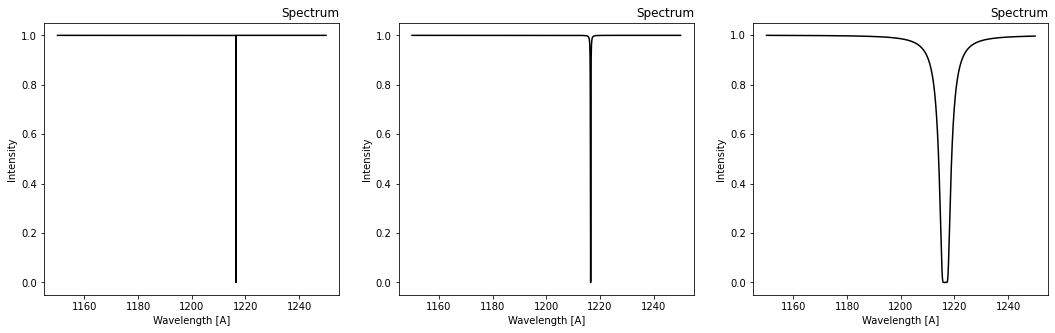

In [6]:
fig = plt.figure(figsize=(18,5))

plt.subplot(131)

d = 1E14 #cm
vo = 2.46607 * 1E15 #Hz

return_spectrum(d, vo)

plt.subplot(132)

d = 1E18 #cm
vo = 2.46607 * 1E15 #Hz

return_spectrum(d, vo)

plt.subplot(133)

d = 1E21 #cm
vo = 2.46607 * 1E15 #Hz

return_spectrum(d, vo)

### Part 2

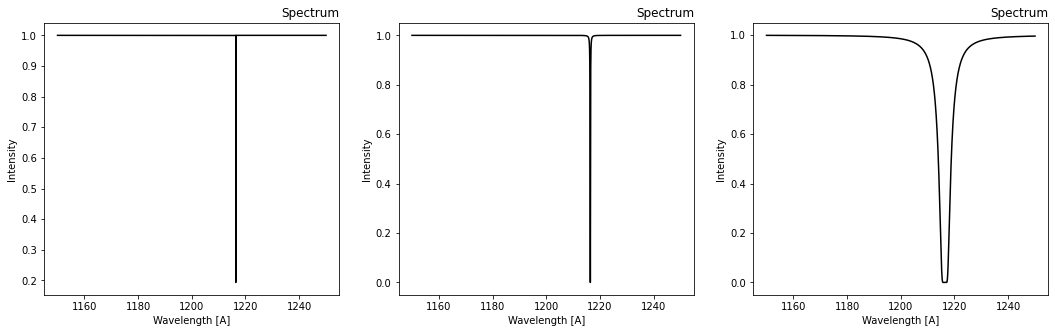

In [7]:
fig = plt.figure(figsize=(18,5))

plt.subplot(131)

d = 1E14 #cm
vo = 2.46632 * 1E15 #Hz

return_spectrum(d, vo)

plt.subplot(132)

d = 1E18 #cm
vo = 2.46632 * 1E15 #Hz

return_spectrum(d, vo)

plt.subplot(133)

d = 1E21 #cm
vo = 2.46632 * 1E15 #Hz

return_spectrum(d, vo)

**We notice that at a particular wavelength, the intensity drops to zero (also called as plunge).** 

Let's find out the solution to the equation:

$$
I(\lambda)=\exp [-\alpha(\nu) d]
$$

### For intensity to be zero, the absorption coefficient $\alpha(\nu)$ has to be $\infty$.

As it is given by:

$$
\alpha(\nu)=\frac{e^{2} f n_{\mathrm{H}}}{4 \pi m_{e} c} \frac{(1-x) g_{0}}{\mathcal{Z}} \frac{\Gamma}{\left(\nu-\nu_{0}\right)^{2}+(\Gamma / 4 \pi)^{2}}
$$

The case exists when,
$$
\nu = \nu_{0}
$$

which implies the wavelength $\lambda_{0}$ is given by:

$$
\lambda_{0} = \frac{c}{\nu_{0}}
$$

Hence, $\lambda_{0}$ should be **1216 Angstroms**. 

The same can be seen in the plots as well.

By looking at the spectra, we can make the following observations:
    
1. As we notice that the **plunge wavelength** $\lambda_{0}$ is simply a function of $\nu_{0}$, it will be same for the plots of part 1 and is given by **1216.5 Angstroms**, and will slightly be different from plots of part 2 because $\nu_{0}$ has changed. 


2. The plunge wavelength for part 2 is given by **1216.3 Angstroms**, although the change is marginal.


3. There **isn't a significant effect with change in $\nu_{0}$**, as the spectra are very similar to each other.


4. There **is a significant effect of $d$, thickness of slab**. We notice that the spectrum with $d = 10^{21}$ **experiences gradual changes in intensity around the zero-intensity wavelength**, compared to other spectra with thinner slabs where there is sharp changes in intensity. **This implies that the uplift/downlift in intensity smoothens with increase in thickness of slab.**